In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import glob
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import ttest_ind
from statannot import add_stat_annotation
import scipy.stats as sp

In [2]:
df = pd.read_excel('SeedArea2024.xlsx',sep='\t') #load dataset 

In [3]:
df.head()

,genotype,days,seed area
0,wildtype,four,64989.608
1,wildtype,four,64970.385
2,wildtype,four,72572.251
3,wildtype,four,71438.616
4,wildtype,four,70183.518


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

four _wildtype v.s. four _ahk2: t-test independent samples with Bonferroni correction, P_val=4.407e-18 stat=1.832e+01
six_wildtype v.s. six_ahk2: t-test independent samples with Bonferroni correction, P_val=1.391e-02 stat=-3.265e+00
four _wildtype v.s. four _ahk3: t-test independent samples with Bonferroni correction, P_val=2.335e-10 stat=9.653e+00
six_wildtype v.s. six_ahk3: t-test independent samples with Bonferroni correction, P_val=2.582e-02 stat=-3.037e+00
four _wildtype v.s. four _ahk4: t-test independent samples with Bonferroni correction, P_val=1.535e-03 stat=4.033e+00
six_wildtype v.s. six_ahk4: t-test independent samples with Bonferroni correction, P_val=2.370e-02 stat=-3.069e+00


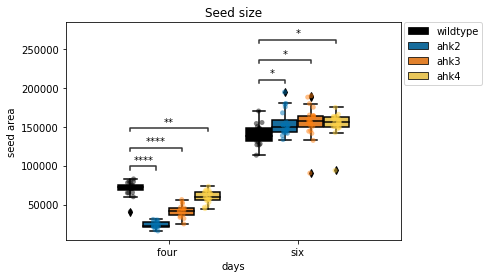

In [7]:
#boxplots to calculate t-test 

#my_colors = {'2xX2x': '#0072B2', '2xX4x': '#FF7F0E', '4xX2x': 'FFF80E'}

xvalues = ["wildtype", "ahk2", "ahk3", "ahk4"]
palette = ['#000000', '#0072B2', '#FF7F0E', '#ffd343']

ax = sns.boxplot(x="days", y="seed area", hue="genotype", palette=palette,              
data=df).set_title('Seed size')
ax = sns.stripplot(x="days", y="seed area", dodge=True,
              data=df, 
              hue="genotype",
              marker='o', 
              palette=palette,
              alpha=0.5)

add_stat_annotation(ax, data=df, x="days", y="seed area", hue="genotype", #To add a t-test
                    box_pairs=[(("four ", "wildtype"), ("four ", "ahk2")),
                             (("four ", "wildtype"), ("four ", "ahk3")),
                             (("four " , "wildtype"), ("four ", "ahk4")),
                             (("six", "wildtype"), ("six", "ahk2")),
                             (("six", "wildtype"), ("six", "ahk3")),
                             (("six", "wildtype"), ("six", "ahk4")),], 
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)

#place the lengend outside on the topleft 
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

ax.figure.savefig("boxplot-SeedSizeCK.png", dpi=300, bbox_inches='tight')